In [108]:
# encoding: utf-8
import pandas as pd
import numpy as np
import re
import matplotlib.pylab as plt

filename = 'movebase_time.csv'
filename_husky = 'husky_poses.csv'
point_file = 'waypoints.csv'
outfile = 'date_result.csv'
outfile_mean = 'mean_out.csv'
    
df = pd.read_csv(filename)
point = pd.read_csv(point_file)
husky = pd.read_csv(filename_husky)

df = df[df.status == 3].reset_index(drop = True)   #消除状态标志不是3的数据

In [109]:


#数据的筛选，取时间戳前后0.1秒的数据进行求和平均
data = []
for i in range(len(df.time)):
    pose_temp = husky[(husky.timestamp > (df.time[i] - 0.1)) & (husky.timestamp < (df.time[i] + 0.1))]
    entry = pose_temp.mean().values
    columns_index = pose_temp.mean().index
    data.append(entry)
    
df_1 = pd.DataFrame(data, columns = columns_index) 

#对获取的数据进行筛选，去到达目标点的第一个时刻的数据
temp_x = df_1.x[0]
temp_y = df_1.y[0]
pose = []
pose.append([df_1.timestamp[0], df_1.x[0], df_1.y[0], df_1.z[0], df_1.yaw[0], df_1.roll[0], df_1.pitch[0]])
for i in range(len(df_1.x) - 1):
    if ((df_1.x[i] - temp_x)**2 + (df_1.y[i] - temp_y)**2)**0.5 < 1:
        continue
    else:
        temp_x = df_1.x[i]
        temp_y = df_1.y[i]
        pose.append([df_1.timestamp[i], df_1.x[i], df_1.y[i], df_1.z[i], df_1.yaw[i], df_1.roll[i], df_1.pitch[i]])
pose
list_1 = ['timestamp', 'x','y','z','yaw','roll','pitch']
df_1 = pd.DataFrame(pose, columns = list_1)  #获取数据
df_2 = df_1.drop(['timestamp'], axis = 1)  #消除时间戳的信息，与waypoint.csv文件格式一致，用于对比

times = len(df_2)//len(point)
re = len(df_2)%len(point)

point_sum = point
for i in range(times - 1):
    point_sum = point_sum.append(point).reset_index().drop(['index'], axis = 1)
point_sum = point_sum.append(point[0:re]).reset_index().drop(['index'], axis = 1)

# df_2.loc[15] = [3.18, 5.44, 0.37, 3.14, 0, 0]#修补缺失的一个点
df_2 = df_2[:15].append(point_sum[15:16]).append(df_2[15:]).reset_index().drop(['index'], axis = 1)
df_2 = df_2[:44]

erro = df_2 - point_sum



In [110]:
df_2[13:20]

,x,y,z,yaw,roll,pitch
13,5.020211,5.507078,0.372536,0.015593,0.009382,0.003208
14,6.757529,5.493018,0.370515,-0.085425,0.001445,0.004230
15,5.319080,5.439562,0.372439,3.126712,0.013821,0.004255
16,3.051566,5.517997,0.376563,3.018517,0.005672,-0.003901
17,7.115046,7.913000,0.358495,-1.499613,0.012855,0.000234
18,7.239209,2.656664,0.380191,-1.701225,0.009843,0.007294
19,3.709048,2.740917,0.383643,-3.020674,0.018423,-0.003074


In [111]:
point_sum[13:20]
print(len(point_sum))

44


In [112]:
erro

,x,y,z,yaw,roll,pitch
0,-0.331493,0.238361,0.000207,0.053809,0.003131,0.002588
1,-0.157483,0.251598,-0.000360,0.020238,0.006671,0.001761
2,-0.091818,0.340927,-0.000126,0.030771,-0.000248,-0.002882
3,-0.296069,0.050974,0.001739,0.101296,-0.001122,0.002910
4,-0.418922,0.067724,0.000066,0.068955,0.004314,-0.001894
5,-0.433443,0.116009,0.001919,-0.084563,-0.004020,-0.001926
6,-0.166613,-0.038208,0.000634,-0.086930,0.001059,0.001388
7,-0.065739,0.111268,0.000406,-0.074696,0.000746,-0.001033
8,-0.331456,-0.108039,0.002056,0.065459,0.005096,0.009249
9,-0.379336,0.156498,0.000562,-0.094031,0.003587,0.002067


In [113]:
erro['timestamp'] = df_1.timestamp

erro = erro.reindex(columns=list_1)
# print(erro)
test = df_1.diff(1)

## 获取机器人运动轨迹的距离

husky_dis = husky[(husky.timestamp > erro.timestamp[0]) & (husky.timestamp < erro.timestamp[len(erro)-1])]
# husky_dis = husky_dis[husky_dis.timestamp < erro.timestamp[len(erro)-1]]
husky_dis = husky_dis.reset_index().drop('index', axis = 1)

list_1 = ['timestamp', 'x', 'y']
husky_dis = husky_dis.reindex(columns=list_1)

husky_sqr = husky_dis.diff(1).reset_index().drop(['index','timestamp'], axis = 1)

husky_sqr['sqr'] = (husky_sqr.x**2 + husky_sqr.y**2)**0.5
husky_sqr['timestamp'] = husky_dis.timestamp

real_dis = []
for i in range(len(erro)-1):
    temp_sqr = husky_sqr[(husky_sqr.timestamp > erro.timestamp[i]) & (husky_sqr.timestamp < erro.timestamp[i+1])]
    real_dis.append(temp_sqr.sqr.sum())
real_dis.insert(0,np.nan)

##

erro['time'] = test.timestamp
erro['dist'] = real_dis
erro['vel'] = erro['dist'] / erro['time']
erro.to_csv(outfile, index = False)

In [114]:

## 获取均值

index_ls = ['p1-2','p2-3','p3-4','p4-5','p5-6','p6-7','p7-8','p8-9','p9-1']

#获取每个点在loop中的平均值
df_1 = erro
data_test = []
n_points = 9
for i in range(0, len(df_1), 9):
    df_temp_1 = df_1.time[i:i+9]
#     print(df_temp_1)
    df_temp_2 = df_1.dist[i:i+9]
#     print(df_temp_2)
    df_temp_3 = df_1.vel[i:i+9]
    entry = list(df_temp_1) + list(df_temp_2) + list(df_temp_3)
    data_test.append(entry)
    
columns_name = ['time_loop_'+str(i+1) for i in range(n_points)]+['dis_loop_'+str(i+1) for i in range(n_points)]+['vel_loop_'+str(i+1) for i in range(n_points)]

df_out = pd.DataFrame(data_test, columns = columns_name)

list_mean = list(df_out.mean())
list_mean  
#获取5个loop的距离信息\

loop_mean_time = list_mean[0:9]
loop_mean_dist = list_mean[9:18]
loop_mean_vel = list_mean[18:]

mean_list = [loop_mean_time, loop_mean_dist, loop_mean_vel]
mean_out = pd.DataFrame(mean_list, columns = index_ls)
mean_out['mean'] = ['time_mean', 'dist_mean', 'vel_mean']

index_list_out = ['mean','p1-2','p2-3','p3-4','p4-5','p5-6','p6-7','p7-8','p8-9','p9-1']
mean_out.reindex(columns = index_list_out)
mean_out.to_csv(outfile_mean, index = False)



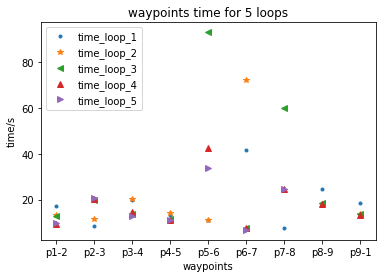

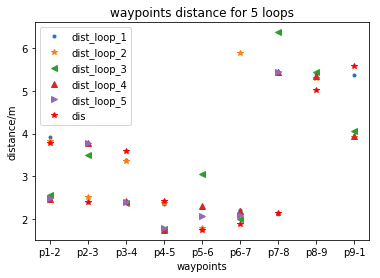

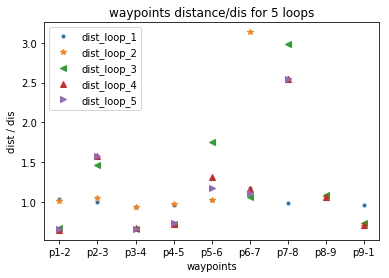

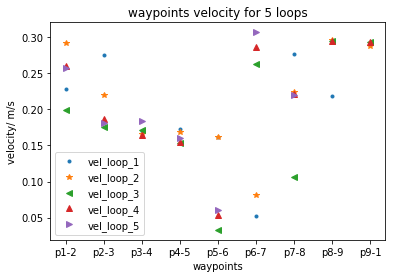

In [115]:
# plt.plot(index_ls, loop_mean_time, '*')
# plt.xlabel('waypoints')
# plt.ylabel('mean_time m/s')
# plt.title('mean_time for 5 loops')
# plt.savefig('./mean_time.jpg', dpi = 900, bbox_inches = 'tight')
# plt.show()

# plt.plot(index_ls, loop_mean_dist, '*')
# plt.xlabel('waypoints')
# plt.ylabel('mean_dist m/s')
# plt.title('mean_time for 5 loops')
# plt.savefig('./mean_dist.jpg', dpi = 900, bbox_inches = 'tight')
# plt.show()

# plt.plot(index_ls, loop_mean_time, '*')
# plt.xlabel('waypoints')
# plt.ylabel('loop_mean_vel m/s')
# plt.title('mean_vel for 5 loops')
# plt.savefig('./mean_vel.jpg', dpi = 900, bbox_inches = 'tight')
# plt.show()

##


#获取9个位置点之间的实际距离（两点间的直线距离）
real_dis = point.append(point[0:1]).reset_index().drop(['index'], axis = 1)
real_dis = real_dis.diff(1).shift(-1)[0:9]
real_dis['dis'] = (real_dis.x**2 + real_dis.y**2)**0.5

#获取机器人运动过程总的时间，距离，速度
list_temp = ['timestamp', 'time', 'dist', 'vel']
data_robot = erro.reindex(columns=list_temp)
data_robot = data_robot.shift(-1)[:len(data_robot)-1]

data = {'point':[1,2,3,4,5,6,7,8,9]}  #创建新的dataframe
df_robot = pd.DataFrame(data)

#获取5个loop的时间信息
df_robot['time_loop_1'] = data_robot.time[0:9].reset_index(drop = True)
df_robot['time_loop_2'] = data_robot.time[9:18].reset_index(drop = True)
df_robot['time_loop_3'] = data_robot.time[18:27].reset_index(drop = True)
df_robot['time_loop_4'] = data_robot.time[27:36].reset_index(drop = True)
df_robot['time_loop_5'] = data_robot.time[36:].reset_index(drop = True)

#获取5个loop的距离信息
df_robot['dist_loop_1'] = data_robot.dist[0:9].reset_index(drop = True)
df_robot['dist_loop_2'] = data_robot.dist[9:18].reset_index(drop = True)
df_robot['dist_loop_3'] = data_robot.dist[18:27].reset_index(drop = True)
df_robot['dist_loop_4'] = data_robot.dist[27:36].reset_index(drop = True)
df_robot['dist_loop_5'] = data_robot.dist[36:].reset_index(drop = True)

#获取5个loop的速度信息
df_robot['vel_loop_1'] = data_robot.vel[0:9].reset_index(drop = True)
df_robot['vel_loop_2'] = data_robot.vel[9:18].reset_index(drop = True)
df_robot['vel_loop_3'] = data_robot.vel[18:27].reset_index(drop = True)
df_robot['vel_loop_4'] = data_robot.vel[27:36].reset_index(drop = True)
df_robot['vel_loop_5'] = data_robot.vel[36:].reset_index(drop = True)




#画散点图，time
# plt.subplot(2,1,1)
plt.plot(index_ls, df_robot.time_loop_1, '.')
plt.plot(index_ls, df_robot.time_loop_2, '*')
plt.plot(index_ls, df_robot.time_loop_3, '<')
plt.plot(index_ls, df_robot.time_loop_4, '^')
plt.plot(index_ls, df_robot.time_loop_5, '>')

plt.xlabel('waypoints')
plt.ylabel('time/s')
plt.legend(loc = 'best')
plt.title('waypoints time for 5 loops')
plt.savefig('./time.png', dpi = 900, bbox_inches = 'tight')

plt.show()

#画散点图，dist
# plt.subplot(2,1,1)
plt.plot(index_ls, df_robot.dist_loop_1, '.')
plt.plot(index_ls, df_robot.dist_loop_2, '*')
plt.plot(index_ls, df_robot.dist_loop_3, '<')
plt.plot(index_ls, df_robot.dist_loop_4, '^')
plt.plot(index_ls, df_robot.dist_loop_5, '>')

#机器人的真实直线距离
plt.plot(index_ls, real_dis.dis, '*r')

plt.xlabel('waypoints')
plt.ylabel('distance/m')
plt.legend(loc = 'best')
plt.title('waypoints distance for 5 loops')
plt.savefig('./distance.png', dpi = 900, bbox_inches = 'tight')

plt.show()

#画散点图，dist
# plt.subplot(2,1,1)

df_robot.dist_loop_1 = df_robot.dist_loop_1/real_dis.dis
df_robot.dist_loop_2 = df_robot.dist_loop_2/real_dis.dis
df_robot.dist_loop_3 = df_robot.dist_loop_3/real_dis.dis
df_robot.dist_loop_4 = df_robot.dist_loop_4/real_dis.dis
df_robot.dist_loop_5 = df_robot.dist_loop_5/real_dis.dis

plt.plot(index_ls, df_robot.dist_loop_1, '.')
plt.plot(index_ls, df_robot.dist_loop_2, '*')
plt.plot(index_ls, df_robot.dist_loop_3, '<')
plt.plot(index_ls, df_robot.dist_loop_4, '^')
plt.plot(index_ls, df_robot.dist_loop_5, '>')

#机器人的真实直线距离
# plt.plot(df_robot.point, real_dis.dis, '*r')

plt.xlabel('waypoints')
plt.ylabel('dist / dis')
plt.legend(loc = 'best')
plt.title('waypoints distance/dis for 5 loops')
plt.savefig('./distance_dis.png', dpi = 900, bbox_inches = 'tight')

plt.show()

#画散点图，velocity
# plt.subplot(2,1,1)
plt.plot(index_ls, df_robot.vel_loop_1, '.')
plt.plot(index_ls, df_robot.vel_loop_2, '*')
plt.plot(index_ls, df_robot.vel_loop_3, '<')
plt.plot(index_ls, df_robot.vel_loop_4, '^')
plt.plot(index_ls, df_robot.vel_loop_5, '>')

plt.xlabel('waypoints')
plt.ylabel('velocity/ m/s')
plt.legend(loc = 'best')
plt.title('waypoints velocity for 5 loops')
plt.savefig('./velocity.png', dpi = 900, bbox_inches = 'tight')

plt.show()

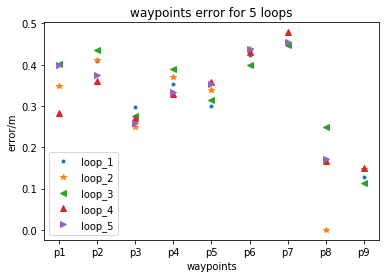

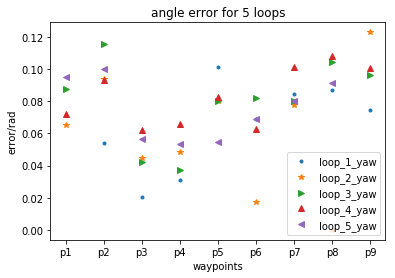

In [118]:
# encoding: utf-8
import pandas as pd
import matplotlib.pylab as plt

filename = 'date_result.csv'
outfile = 'out_plot.csv'


df = pd.read_csv(filename)

df['sq_x_y'] = (df.x**2 + df.y**2)**0.5
df_1 = df.shift(1)  #数据向后移动一行，

data = {'point':[1,2,3,4,5,6,7,8,9]}  #创建新的dataframe
df_error = pd.DataFrame(data)

df_error['loop_1'] = df_1.sq_x_y[0:9].reset_index(drop = True)
df_error['loop_2'] = df_1.sq_x_y[9:18].reset_index(drop = True)
df_error['loop_3'] = df_1.sq_x_y[18:27].reset_index(drop = True)
df_error['loop_4'] = df_1.sq_x_y[27:36].reset_index(drop = True)
df_error['loop_5'] = df_1.sq_x_y[36:].reset_index(drop = True)

df_error['loop_1_yaw'] = df_1.yaw[0:9].reset_index(drop = True)
df_error['loop_2_yaw'] = df_1.yaw[9:18].reset_index(drop = True)
df_error['loop_3_yaw'] = df_1.yaw[18:27].reset_index(drop = True)
df_error['loop_4_yaw'] = df_1.yaw[27:36].reset_index(drop = True)
df_error['loop_5_yaw'] = df_1.yaw[36:].reset_index(drop = True)

df_error.to_csv(outfile, index = False)
df_error = abs(df_error)

index_ls = ['p1','p2','p3','p4','p5','p6','p7','p8','p9']

#画散点图，点的误差
# plt.subplot(2,1,1)
plt.plot(index_ls, df_error.loop_1, '.')
plt.plot(index_ls, df_error.loop_2, '*')
plt.plot(index_ls, df_error.loop_3, '<')
plt.plot(index_ls, df_error.loop_4, '^')
plt.plot(index_ls, df_error.loop_5, '>')

plt.xlabel('waypoints')
plt.ylabel('error/m')

plt.legend(loc = 'best')
plt.title('waypoints error for 5 loops')
plt.savefig('./point_erro.png', dpi = 900, bbox_inches = 'tight')

plt.show()

#画散点图，角度的误差
# plt.subplot(2,1,2)
plt.plot(index_ls, df_error.loop_1_yaw, '.')
plt.plot(index_ls, df_error.loop_2_yaw, '*')
plt.plot(index_ls, df_error.loop_3_yaw, '>')
plt.plot(index_ls, df_error.loop_4_yaw, '^')
plt.plot(index_ls, df_error.loop_5_yaw, '<')

plt.xlabel('waypoints')
plt.ylabel('error/rad')
plt.legend(loc = 'best')
plt.title('angle error for 5 loops')

plt.savefig('./yaw_erro.png', dpi = 900, bbox_inches = 'tight')

# plt.savefig('./result.png', dpi = 1600, bbox_inches = 'tight')

plt.show()

